In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
lol = pd.read_csv('lol_data_02.csv')
lolds = lol.dropna(how="all")
columns = lolds.columns

In [15]:
blue_id = 100
red_id = 200
success_array = lolds['result'] == 1
blue_teams_columns = lolds['playerid'] == blue_id
red_teams_columns = lolds['playerid'] == red_id
blue_win = len(lolds[success_array][blue_teams_columns])
red_win = len(lolds[success_array][red_teams_columns])

In [16]:
print(blue_win, red_win)

3402 2993


In [17]:
Teams = lolds[lolds["playerid"]==(blue_id or red_id)]
Players = lolds[lolds["playerid"]!=(blue_id or red_id)]


In [20]:
print(Teams["kills"].describe())

count    6395.000000
mean       13.585614
std         6.994947
min         0.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        42.000000
Name: kills, dtype: float64


In [21]:
print(Teams["deaths"].describe())

count    6395.000000
mean       13.051446
std         7.301540
min         0.000000
25%         7.000000
50%        13.000000
75%        18.000000
max        53.000000
Name: deaths, dtype: float64


In [22]:
print(Teams["assists"].describe())

count    6395.000000
mean       31.117123
std        17.164466
min         0.000000
25%        17.000000
50%        31.000000
75%        43.000000
max       108.000000
Name: assists, dtype: float64


In [23]:
print(Teams["dragons"].describe())

count    6395.000000
mean        2.402189
std         1.430464
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: dragons, dtype: float64


In [24]:
print(Teams["heralds"].describe())

count    6352.000000
mean        1.177267
std         0.769682
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: heralds, dtype: float64


In [25]:
print(Teams["barons"].describe())

count    6395.000000
mean        0.637998
std         0.692577
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: barons, dtype: float64


In [26]:
print(Teams["towers"].describe())

count    6395.000000
mean        6.251916
std         3.574472
min         0.000000
25%         3.000000
50%         7.000000
75%         9.000000
max        11.000000
Name: towers, dtype: float64


In [27]:
print(Teams["visionscore"].describe())

count    6392.000000
mean      239.970119
std        68.837961
min        68.000000
25%       190.000000
50%       233.000000
75%       281.000000
max       541.000000
Name: visionscore, dtype: float64


In [28]:
print(Teams["totalgold"].describe())

count      6395.000000
mean      57223.981079
std       10846.233311
min       26285.000000
25%       49965.500000
50%       56661.000000
75%       63962.000000
max      106586.000000
Name: totalgold, dtype: float64


In [29]:
print(Teams["minionkills"].describe())

count    4701.000000
mean      816.566901
std       145.677527
min       351.000000
25%       715.000000
50%       803.000000
75%       906.000000
max      1483.000000
Name: minionkills, dtype: float64


In [30]:
print(Teams["monsterkills"].describe())

count    6395.000000
mean      209.909304
std        51.035112
min        66.000000
25%       174.000000
50%       207.000000
75%       242.000000
max       435.000000
Name: monsterkills, dtype: float64


In [31]:
print(Teams["goldat15"].describe())

count     6344.000000
mean     24687.603878
std       1844.296138
min      19593.000000
25%      23381.000000
50%      24511.000000
75%      25758.250000
max      34110.000000
Name: goldat15, dtype: float64


In [32]:
print(Teams["xpat15"].describe())

count     6344.000000
mean     28966.867434
std       1543.770288
min      23168.000000
25%      27939.750000
50%      28943.000000
75%      30018.250000
max      34910.000000
Name: xpat15, dtype: float64


In [33]:
print(Teams["csat15"].describe())

count    6344.000000
mean      498.296185
std        35.456289
min       329.000000
25%       476.000000
50%       500.000000
75%       522.000000
max       614.000000
Name: csat15, dtype: float64


In [34]:
mid_players = Players['position'] == 'mid'
winner_players = Players['result'] == 1
winner_mid_players = Players[mid_players & winner_players]      
print(winner_mid_players['golddiffat15'].describe())

count    6344.000000
mean      341.519231
std       846.293689
min     -2943.000000
25%      -209.000000
50%       301.000000
75%       863.250000
max      4003.000000
Name: golddiffat15, dtype: float64


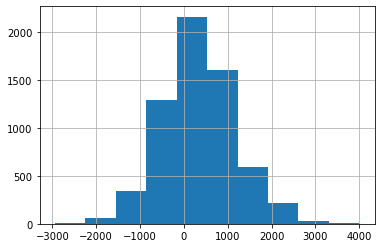

In [35]:
winner_mid_players['golddiffat15'].hist()

plt.show()